In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
df = pd.read_excel("/content/Egypt_Weather_Daily_OVR(10Y)_dataset.xlsx", sheet_name="Sheet1", engine="openpyxl")
df.head(10)

,date,latitude,longitude,governorate,temperature_2m,relative_humidity_2m,precipitation,weather_code,wind_speed_10m,wind_direction_10m,is_day
0,2015-04-22,30.0444,31.2357,Cairo,20.125000,51.333333,0.0,0.0,12.508333,296.500000,0.541667
1,2015-04-23,30.0444,31.2357,Cairo,17.358333,45.041667,0.0,0.0,16.354167,317.541667,0.541667
2,2015-04-24,30.0444,31.2357,Cairo,17.558333,42.583333,0.0,0.0,11.308333,130.000000,0.541667
3,2015-04-25,30.0444,31.2357,Cairo,18.958333,37.500000,0.0,0.0,17.158333,47.916667,0.541667
4,2015-04-26,30.0444,31.2357,Cairo,21.904167,41.708333,0.0,0.0,12.170833,56.500000,0.541667
5,2015-04-27,30.0444,31.2357,Cairo,26.683333,26.875000,0.0,0.0,12.525000,208.916667,0.541667
6,2015-04-28,30.0444,31.2357,Cairo,24.608333,44.375000,0.0,0.0,6.333333,277.250000,0.541667
7,2015-04-29,30.0444,31.2357,Cairo,26.500000,37.041667,0.0,0.0,11.704167,246.500000,0.541667
8,2015-04-30,30.0444,31.2357,Cairo,21.920833,53.166667,0.0,0.0,12.966667,221.500000,0.541667
9,2015-05-01,30.0444,31.2357,Cairo,21.362500,52.666667,0.0,0.0,11.516667,163.166667,0.541667


In [3]:
print(df.columns.tolist())


['date', 'latitude', 'longitude', 'governorate', 'temperature_2m', 'relative_humidity_2m', 'precipitation', 'weather_code', 'wind_speed_10m', 'wind_direction_10m', 'is_day']


In [4]:
df['date'] = pd.to_datetime(df['date'])

In [5]:
duplicates = df[df.duplicated()]
num_duplicates = len(duplicates)
has_duplicates = df.duplicated().any()
print(has_duplicates)

print( df.isnull().sum())
df.dropna(inplace=True)


False
date                     0
latitude                 0
longitude                0
governorate              0
temperature_2m          27
relative_humidity_2m    27
precipitation            0
weather_code            27
wind_speed_10m          27
wind_direction_10m      27
is_day                   0
dtype: int64


In [6]:
print("Original Data Types:")
print(df.dtypes)


Original Data Types:
date                    datetime64[ns]
latitude                       float64
longitude                      float64
governorate                     object
temperature_2m                 float64
relative_humidity_2m           float64
precipitation                  float64
weather_code                   float64
wind_speed_10m                 float64
wind_direction_10m             float64
is_day                         float64
dtype: object


In [7]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df['governorate'] = df['governorate'].astype(str).str.strip().str.lower()

numeric_cols = df.select_dtypes(include=[np.number]).columns

In [8]:
outliers = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers[col] = df[(df[col] < lower) | (df[col] > upper)].shape[0]
    outlier_summary = pd.DataFrame.from_dict(outliers, orient='index', columns=['outlier_count'])
print(outlier_summary.sort_values(by='outlier_count', ascending=False))

                      outlier_count
weather_code                  15264
precipitation                  8706
wind_speed_10m                 3861
longitude                      3650
latitude                          0
relative_humidity_2m              0
temperature_2m                    0
wind_direction_10m                0
is_day                            0


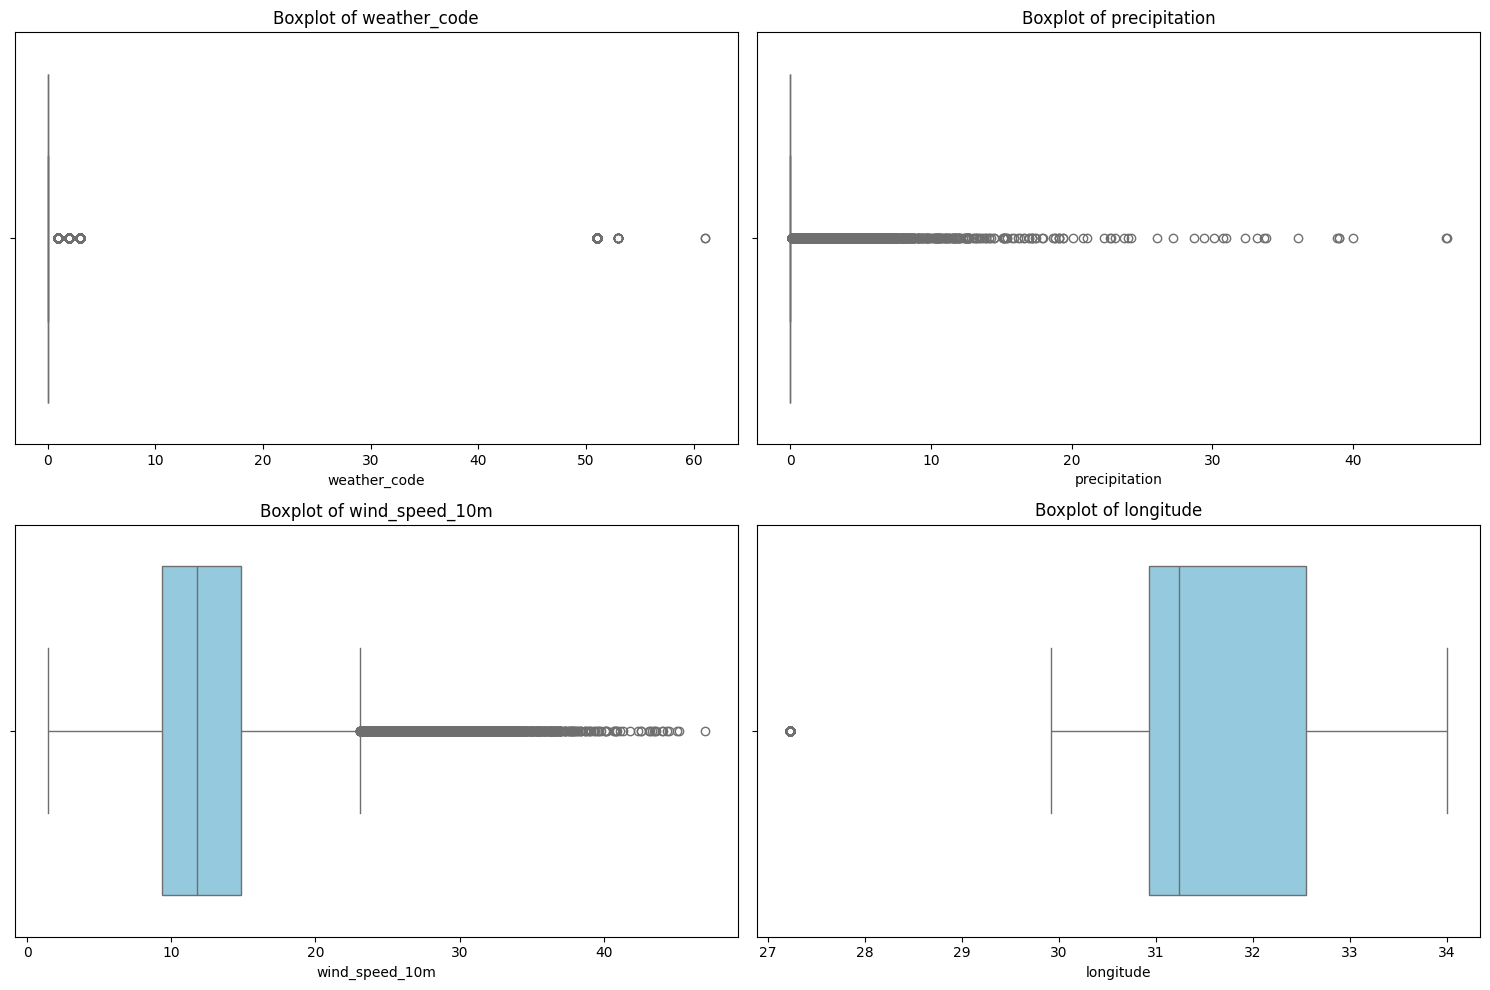

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

columns_with_outliers = [
    'weather_code',
    'precipitation',
    'wind_speed_10m',
    'longitude'
]

plt.figure(figsize=(15, 10))

for i, col in enumerate(columns_with_outliers, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

The original range: 0.0 - 61.0

A statistical description of weather_code:
count    98550.000000
mean         0.612735
std          3.727919
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         61.000000
Name: weather_code, dtype: float64

====Number of outliers (outside the range of 0-99) ====
0
Number of invalid values: 0
The new range: 0.0 - 61.0


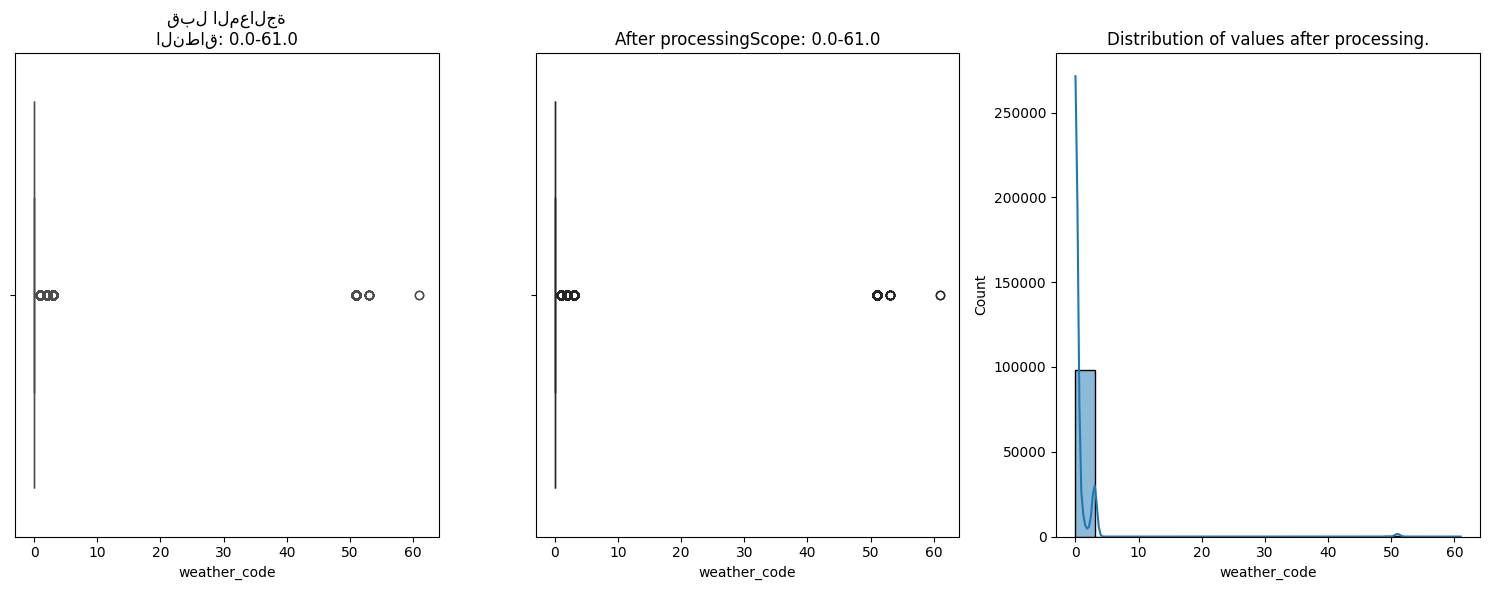

In [11]:
print("The original range:", df['weather_code'].min(), "-", df['weather_code'].max())
print("\nA statistical description of weather_code:")
print(df['weather_code'].describe())

valid_min, valid_max = 0, 61
outliers = df[(df['weather_code'] < valid_min) | (df['weather_code'] > valid_max)]
print(f"\n====Number of outliers (outside the range of 0-99) ====\n{len(outliers)}")

df.loc[(df['weather_code'] < valid_min) | (df['weather_code'] > valid_max), 'weather_code'] = pd.NA

print("Number of invalid values:", df['weather_code'].isna().sum())
print("The new range:", df['weather_code'].min(), "-", df['weather_code'].max())

plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
df_before = df.copy()

sns.boxplot(x=df_before['weather_code'], color='red')
plt.title(f'قبل المعالجة\nالنطاق: {df_before["weather_code"].min()}-{df_before["weather_code"].max()}')
plt.xlabel('weather_code')

plt.subplot(1, 3, 2)
sns.boxplot(x=df['weather_code'].dropna(), color='green')
plt.title(f'After processingScope: {df["weather_code"].min()}-{df["weather_code"].max()}')
plt.xlabel('weather_code')

plt.subplot(1, 3, 3)
sns.histplot(df['weather_code'].dropna(), bins=20, kde=True)
plt.title('Distribution of values after processing.')
plt.xlabel('weather_code')

plt.tight_layout()
plt.show()

if df['weather_code'].isna().sum() > 0:
    missing_percentage = df['weather_code'].isna().mean() * 100
    print(f"Percentage of missing values: {missing_percentage:.2f}%")

    print("Suggestions for handling missing values:")
    print("- It can be replaced by the mode (the most frequently occurring value):", df['weather_code'].mode()[0])
    print("-Or use advanced imputation such as KNNImputer.")

In [12]:
df.loc[df['precipitation'] < 0, 'precipitation'] = 0

upper_limit = df['precipitation'].quantile(0.99)
df['precipitation'] = df['precipitation'].clip(upper=upper_limit)

In [13]:
df.loc[df['wind_speed_10m'] < 0, 'wind_speed_10m'] = 0

Q1 = df['wind_speed_10m'].quantile(0.25)
Q3 = df['wind_speed_10m'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

df.loc[df['wind_speed_10m'] > upper_bound, 'wind_speed_10m'] = upper_bound

In [14]:
min_long, max_long = 25, 60

df.loc[(df['longitude'] < min_long) | (df['longitude'] > max_long), 'longitude'] = pd.NA

In [16]:
df_clean = df.copy()

df_clean['month'] = df_clean['date'].dt.month
df_clean['day_of_year'] = df_clean['date'].dt.dayofyear
df_clean['season'] = (df_clean['month'] % 12 + 3) // 3
df_clean['is_weekend'] = df_clean['date'].dt.weekday >= 5

def classify_region(lat, lon):
    if 24.0 <= lat <= 28.0 and 26.0 <= lon <= 34.0:
        return 'southern'
    elif 28.0 < lat <= 30.5 and 30.0 <= lon <= 32.0:
        return 'cairo_area'
    elif lat > 30.5 and lon > 32.0:
        return 'northern_coastal'
    else:
        return 'other'

df_clean['region'] = df_clean.apply(lambda x: classify_region(x['latitude'], x['longitude']), axis=1)

if 'temperature_2m' in df_clean.columns:
    df_clean['temp_range'] = df_clean['temperature_2m'] * 0.2
    df_clean['wind_chill'] = (13.12 + 0.6215*df_clean['temperature_2m'] -
                            11.37*(df_clean['wind_speed_10m']**0.16) +
                            0.3965*df_clean['temperature_2m']*(df_clean['wind_speed_10m']**0.16))

if 'precipitation' in df_clean.columns:
    df_clean['rainy_day'] = (df_clean['precipitation'] > 0.5).astype(int)

if 'temperature_2m' in df_clean.columns:
    df_clean['hot_day'] = (df_clean['temperature_2m'] > 35).astype(int)

if 'wind_direction_10m' in df_clean.columns:
    def classify_wind_direction(degree):
        if pd.isna(degree):
            return 'unknown'
        degree = degree % 360
        if 0 <= degree < 45:
            return 'north'
        elif 45 <= degree < 135:
            return 'east'
        elif 135 <= degree < 225:
            return 'south'
        elif 225 <= degree < 315:
            return 'west'
        else:
            return 'northwest'

    df_clean['wind_direction_cat'] = df_clean['wind_direction_10m'].apply(classify_wind_direction)

if 'temperature_2m' in df_clean.columns:
    df_clean.sort_values(['governorate', 'date'], inplace=True)
    for lag in [1, 2, 3]:
        df_clean[f'temp_lag_{lag}'] = df_clean.groupby('governorate')['temperature_2m'].shift(lag)

categorical_cols = ['region', 'season', 'wind_direction_cat'] if 'wind_direction_cat' in df_clean.columns else ['region', 'season']
df_clean = pd.get_dummies(df_clean, columns=categorical_cols)

if 'weather_code' in df_clean.columns:
    weather_types = {
        1: 'clear',
        2: 'partly_cloudy',
        3: 'cloudy',
        4: 'fog',
        5: 'drizzle',
        6: 'rain',
        7: 'snow',
        8: 'shower',
        9: 'thunderstorm'
    }
    df_clean['weather_type'] = df_clean['weather_code'].map(weather_types).fillna('other')
    df_clean = pd.get_dummies(df_clean, columns=['weather_type'])

if 'is_day' in df_clean.columns:
    df_clean['daytime'] = df_clean['is_day'].map({1: 'day', 0: 'night'})
    df_clean = pd.get_dummies(df_clean, columns=['daytime'])

print("\nالميزات الجديدة المضافة:")
print([col for col in df_clean.columns if col not in df.columns])

df_clean.to_csv('Egypt_Weather_With_Features_Fixed.csv', index=False)


الميزات الجديدة المضافة:
['month', 'day_of_year', 'is_weekend', 'temp_range', 'wind_chill', 'rainy_day', 'hot_day', 'temp_lag_1', 'temp_lag_2', 'temp_lag_3', 'region_cairo_area', 'region_northern_coastal', 'region_other', 'region_southern', 'season_1', 'season_2', 'season_3', 'season_4', 'wind_direction_cat_east', 'wind_direction_cat_north', 'wind_direction_cat_northwest', 'wind_direction_cat_south', 'wind_direction_cat_west', 'weather_type_clear', 'weather_type_cloudy', 'weather_type_other', 'weather_type_partly_cloudy']


In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd

df_clean['date'] = pd.to_datetime(df_clean['date'])
df_clean = df_clean.sort_values(['governorate', 'date'])

for gov in df_clean['governorate'].unique():
    try:
        gov_data = df_clean[df_clean['governorate'] == gov].set_index('date')

        gov_data['temperature_2m'] = gov_data['temperature_2m'].interpolate(method='linear')

        gov_data = gov_data.dropna(subset=['temperature_2m'])

        if len(gov_data) >= 730:
            result = seasonal_decompose(gov_data['temperature_2m'],
                                      model='additive',
                                      period=365,
                                      extrapolate_trend='freq')

            df_clean.loc[df_clean['governorate'] == gov, 'temp_trend'] = result.trend
            df_clean.loc[df_clean['governorate'] == gov, 'temp_seasonal'] = result.seasonal
            df_clean.loc[df_clean['governorate'] == gov, 'temp_residual'] = result.resid

        else:
            print(f"Governorate {gov} Does not contain sufficient data.({len(gov_data)} يوم فقط)")

    except Exception as e:
        print(f"An error occurred while processing the governorate.{gov}: {str(e)}")

In [18]:
from sklearn.preprocessing import StandardScaler

num_cols = ['temperature_2m', 'wind_speed_10m', 'precipitation']
num_cols = [col for col in num_cols if col in df_clean.columns]

if num_cols:
    scaler = StandardScaler()
    df_clean[num_cols] = scaler.fit_transform(df_clean[num_cols])

try:
    excel_file = 'Egypt_Weather_Processed.xlsx'

    df_clean.to_excel(excel_file,
                     index=False,
                     sheet_name='Weather_Data',
                     engine='openpyxl')

    print(f"The data has been successfully saved in the file: {excel_file}")

except Exception as e:
    print(f"An error occurred while saving {str(e)}")

The data has been successfully saved in the file: Egypt_Weather_Processed.xlsx


In [ ]:
!pip install openpyxl
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows

wb = Workbook()
ws = wb.active

for r in dataframe_to_rows(df_clean, index=False, header=True):
    ws.append(r)

for column in ws.columns:
    max_length = 0
    column_letter = column[0].column_letter
    for cell in column:
        try:
            if len(str(cell.value)) > max_length:
                max_length = len(cell.value)
        except:
            pass
    adjusted_width = (max_length + 2)
    ws.column_dimensions[column_letter].width = adjusted_width

wb.save("Formatted_Weather_Data.xlsx")